In [74]:
cd("D:\\NUS_differential_equation\\SOLOW_eqn_final_training\\")

In [75]:
include(".\\addition\\Addition_Methods.jl")
training_1= CSV.read("Eqn1.csv")

,Albania,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.315385,-0.365085,-0.129759,-0.0386792,0.123116,0.16721,-0.379107
2,0.480738,0.401279,0.209248,0.00304851,-0.117758,-0.0779962,-0.0239767
3,-0.155378,0.193359,-0.285671,-0.0950609,-0.376659,-0.304799,0.305403
4,-0.524337,-0.49849,-0.392856,-0.371067,0.104213,0.460908,-0.466064
5,0.496397,0.312354,-0.148035,0.427938,0.364014,0.337904,0.297171
6,0.0684203,-0.10623,-0.471297,-0.0863382,-0.499476,0.13334,0.0806113
7,-0.0819718,0.407028,-0.226086,-0.223112,-0.110896,-0.109254,-0.138837
8,0.292213,-0.354993,0.224698,-0.274763,0.414215,0.164845,0.223585
9,-0.482882,-0.326609,-0.228513,0.0923917,0.217039,-0.154773,0.110989


In [70]:
country1= "Albania" # loss didnot converge as well well
country2= "Australia" # Loss converge very well 
country3= "Philippines" # loss converge badly at equation 2
ann = FastChain(FastDense(1, 20, tanh),FastDense(20, 20, tanh),
                FastDense(20, 1))
nnp = initial_params(ann)

481-element Array{Float32,1}:
  0.07611742
  0.24426454
  0.41018236
 -0.3297632
  0.053379554
  0.27051657
  0.117201045
  0.23474719
 -0.081142634
 -0.27466473
 -0.26874527
 -0.25609595
 -0.4962953
  ⋮
  0.08620596
 -0.26998463
  0.025881298
  0.32222998
  0.011719136
 -0.46328142
 -0.049723428
 -0.26575083
  0.32365066
 -0.28208748
  0.3056142
  0.0

In [48]:
function trainer1(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=400)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/100),cb=callback, maxiters=400)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/1000),cb=callback, maxiters=400)
    return res1
end

trainer1 (generic function with 1 method)

In [49]:
function trainer2(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=1200)

end

trainer2 (generic function with 1 method)

In [50]:
function trainer3(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/10),cb=callback, maxiters=1200)
    return res1
end

trainer3 (generic function with 1 method)

In [51]:
function trainer4(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/10),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/100),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/100),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/1000),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/1000),cb=callback, maxiters=200)
    return res1
end

trainer4 (generic function with 1 method)

In [52]:
function trainer5(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=600)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/10),cb=callback, maxiters=600)

    return res1
end

trainer5 (generic function with 1 method)

## Australia

In [53]:
actual= getCleandataFrame(country1)
para_1,pred_value_1,losses_1=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer1)
para_2,pred_value_2,losses_2=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer2)
para_3,pred_value_3,losses_3=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer3)
para_4,pred_value_4,losses_4=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer4)
para_5,pred_value_5,losses_5=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer5)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = getCleandataFrame(::String) at Addition_Methods.jl:160
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:160
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = getCleandataFrame(::String) at Addition_Methods.jl:162
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:162
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = getCleandataFrame(::String) at Addition_Methods.jl:163
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:163
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = getCleandataFrame(::String) at Addition_Methods.jl:164
└ @ Main D:\NUS_differen

"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = train_eqn2_addition_modified(::String, ::CSV.Column{Float64,Float64}, ::Array{Float32,1}, ::Function) at Addition_Methods.jl:654
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:654
loss: 1.37: 100%|█████████████████████████████████████████| Time: 0:01:05
loss: 0.0527:  22%|██████████                               |  ETA: 0:00:38

0.05273145123806732


loss: 0.0319:  47%|████████████████████                     |  ETA: 0:00:25

0.0318980948932604


loss: 0.0165:  71%|██████████████████████████████           |  ETA: 0:00:13

0.016349751884332495

loss: 0.0162:  72%|██████████████████████████████           |  ETA: 0:00:13

loss: 0.00742:  96%|████████████████████████████████████████ |  ETA: 0:00:02

0.007418494774480275


loss: 0.00654: 100%|█████████████████████████████████████████| Time: 0:00:45
loss: 0.0022:  21%|█████████                                |  ETA: 0:00:31

0.002195933748967213


loss: 0.00104:  45%|███████████████████                      |  ETA: 0:00:20

0.0010405388332389992

loss: 0.00104:  46%|███████████████████                      |  ETA: 0:00:20

loss: 0.000776:  70%|█████████████████████████████            |  ETA: 0:00:11

0.0007762832667406486


loss: 0.000602:  95%|███████████████████████████████████████  |  ETA: 0:00:02

0.0006006986133740114

loss: 0.00057: 100%|█████████████████████████████████████████| Time: 0:00:36
loss: 0.000536:  19%|████████                                 |  ETA: 0:00:27

0.0005352437662160448

loss: 0.000535:  20%|█████████                                |  ETA: 0:00:27

loss: 0.000496:  44%|███████████████████                      |  ETA: 0:00:18

0.0004947034269017193

loss: 0.000495:  44%|███████████████████                      |  ETA: 0:00:18

loss: 0.000458:  69%|█████████████████████████████            |  ETA: 0:00:10

0.00045805294399458587

loss: 0.000458:  69%|█████████████████████████████            |  ETA: 0:00:10

loss: 0.000424:  94%|███████████████████████████████████████  |  ETA: 0:00:02

0.00042375244769415703


loss: 0.000415: 100%|█████████████████████████████████████████| Time: 0:00:32


"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[53]:3
└ @ Core In[53]:3
loss: 1.37: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.0527:   7%|███                                      |  ETA: 0:02:17

0.05273145123806732


loss: 0.0321:  16%|███████                                  |  ETA: 0:02:03

0.0318980948932604


loss: 0.0163:  24%|██████████                               |  ETA: 0:01:51

0.016349751884332495


loss: 0.00742:  32%|██████████████                           |  ETA: 0:01:39

0.007418494774480275


loss: 0.00324:  40%|█████████████████                        |  ETA: 0:01:25

0.003239729923197931


loss: 0.0016:  48%|████████████████████                     |  ETA: 0:01:12

0.0015916947046384488

loss: 0.00158:  49%|████████████████████                     |  ETA: 0:01:12

loss: 0.00102:  57%|████████████████████████                 |  ETA: 0:00:59

0.0010199061990925227


loss: 0.000825:  65%|███████████████████████████              |  ETA: 0:00:47

0.0008251340590351947


loss: 0.000739:  73%|███████████████████████████████          |  ETA: 0:00:36

0.0007393179103447076


loss: 0.000681:  82%|██████████████████████████████████       |  ETA: 0:00:24

0.0006801393419559001

loss: 0.00068:  82%|██████████████████████████████████       |  ETA: 0:00:24

loss: 0.000627:  90%|█████████████████████████████████████    |  ETA: 0:00:14

0.0006267759462978786

loss: 0.000626:  90%|█████████████████████████████████████    |  ETA: 0:00:13

loss: 0.000576:  98%|█████████████████████████████████████████|  ETA: 0:00:03

0.0005755043273047406


loss: 0.000564: 100%|█████████████████████████████████████████| Time: 0:02:11


"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[53]:4
└ @ Core In[53]:4
loss: 1.37: 100%|█████████████████████████████████████████| Time: 0:00:01


"Austra

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[53]:5
└ @ Core In[53]:5


lia

loss: 24.7:  10%|█████                                    |  ETA: 0:00:01

"

loss: 1.37: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 0.0527:  44%|███████████████████                      |  ETA: 0:00:21

0.05273145123806732


loss: 0.0319:  94%|███████████████████████████████████████  |  ETA: 0:00:02

0.0318980948932604


loss: 0.0295: 100%|█████████████████████████████████████████| Time: 0:00:31
loss: 4.01e-05:  28%|████████████                             |  ETA: 0:00:16

4.013127043040739e-5


loss: 3.99e-05:  77%|████████████████████████████████         |  ETA: 0:00:06

3.992088078837635e-5

loss: 3.99e-05:  78%|████████████████████████████████         |  ETA: 0:00:06

loss: 3.99e-05: 100%|█████████████████████████████████████████| Time: 0:00:25
loss: 2.04e-06:  10%|█████                                    |  ETA: 0:00:17

2.0428973436546774e-6


loss: 2.02e-06:  60%|█████████████████████████                |  ETA: 0:00:08

2.0155375837844678e-6


loss: 2.01e-06: 100%|█████████████████████████████████████████| Time: 0:00:19


(Float32[-0.45858586, -0.15368772, -0.4462389, -0.35352722, 0.15432175, -0.09452163, -0.063247375, -0.06373042, 0.10431721, -0.20493545  …  -0.21710037, -0.28856075, 0.065408744, 0.4130629, -0.39663222, 0.1064538, -0.30603278, 0.09172856, 0.466982, -0.0002580208], Float32[0.017194, 0.020653091, 0.016392201, 0.015183739, 0.016758729, 0.018994998, 0.020508643, 0.020984743, 0.020781616, 0.020399436, 0.020213448, 0.020444611, 0.02114347, 0.022345068, 0.023640445, 0.024785928, 0.025653984, 0.025840368, 0.025087811, 0.023153625], Any[24.74633254424554, 17.440205253193437, 11.417991570986839, 6.7913973588360825, 3.4197228985036747, 1.2882040298160717, 0.25049213368935586, 0.09869740546490341, 0.570938332594991, 1.3710500380857118  …  2.0142767641671424e-6, 2.0161567061003583e-6, 2.025341349963879e-6, 2.0155501203142278e-6, 2.011713700052611e-6, 1.986776717702124e-6, 2.0084049517459205e-6, 2.008191251323231e-6, 2.008174300354246e-6, 2.008174300354246e-6])

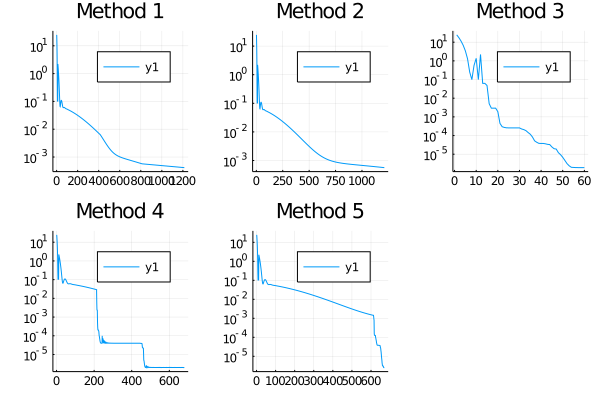

In [61]:
A=plot(losses_1, title="Method 1",yaxis=:log)
B=plot(losses_2, title="Method 2",yaxis=:log)
C=plot(losses_3, title="Method 3",yaxis=:log)
D=plot(losses_4, title="Method 4",yaxis=:log)
E=plot(losses_5,yaxis=:log, title="Method 5")
plot(A,B,C,D,E,Elayout=6)

"Austra

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[55]:1
└ @ Core In[55]:1


lia

loss: 24.7:  10%|█████                                    |  ETA: 0:00:01

"

loss: 1.37: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.0527:  15%|██████                                   |  ETA: 0:01:18

0.05273145123806732


loss: 0.0321:  31%|█████████████                            |  ETA: 0:01:00

0.0318980948932604

loss: 0.0317:  31%|█████████████                            |  ETA: 0:00:59

loss: 0.0163:  48%|████████████████████                     |  ETA: 0:00:45

0.016349751884332495


loss: 0.00742:  64%|███████████████████████████              |  ETA: 0:00:32

0.007418494774480275


loss: 0.00327:  80%|██████████████████████████████████       |  ETA: 0:00:17

0.003239729923197931

loss: 0.00321:  81%|██████████████████████████████████       |  ETA: 0:00:16

loss: 0.0016:  97%|████████████████████████████████████████ |  ETA: 0:00:02

0.0015916947046384488

loss: 0.00158:  97%|████████████████████████████████████████ |  ETA: 0:00:02

loss: 0.00144: 100%|█████████████████████████████████████████| Time: 0:01:21


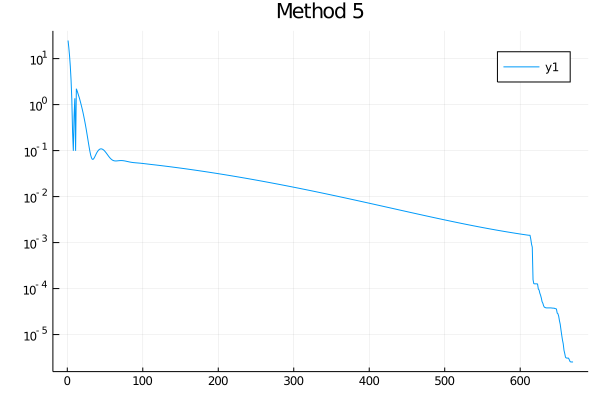

## Albania

In [56]:
actual1= getCleandataFrame(country1)
para_1a,pred_value_1a,losses_1a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer1)
para_2a,pred_value_2a,losses_2a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer2)
para_3a,pred_value_3a,losses_3a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer3)
para_4a,pred_value_4a,losses_4a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer4)
para_5a,pred_value_5a,losses_5a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer5)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2


"Albania

loss: 322:  10%|█████                                    |  ETA: 0:01:28

"

loss: 20.4: 100%|█████████████████████████████████████████| Time: 0:00:11
loss: 0.123:  22%|██████████                               |  ETA: 0:01:04

0.12260220531785324


loss: 0.112:  47%|████████████████████                     |  ETA: 0:00:39

0.11179579559486551


loss: 0.101:  72%|██████████████████████████████           |  ETA: 0:00:20

0.10147783741683963


loss: 0.0903:  96%|████████████████████████████████████████ |  ETA: 0:00:03

0.09030598053900685


loss: 0.0886: 100%|█████████████████████████████████████████| Time: 0:01:09
loss: 0.0571:  21%|█████████                                |  ETA: 0:00:46

0.05709470615661334


loss: 0.0311:  46%|███████████████████                      |  ETA: 0:00:39

0.031137109232007392


loss: 0.0158:  70%|█████████████████████████████            |  ETA: 0:00:20

0.015808197400147148


loss: 0.00757:  95%|███████████████████████████████████████  |  ETA: 0:00:03

0.007569231142777925


loss: 0.00651: 100%|█████████████████████████████████████████| Time: 0:01:04
loss: 0.00561:  20%|████████                                 |  ETA: 0:00:48

0.005612844123524381


loss: 0.00468:  44%|███████████████████                      |  ETA: 0:00:33

0.004684975978105617


loss: 0.00391:  69%|█████████████████████████████            |  ETA: 0:00:19

0.0039092806561810325


loss: 0.00327:  94%|███████████████████████████████████████  |  ETA: 0:00:04

0.0032716172088666836


loss: 0.00313: 100%|█████████████████████████████████████████| Time: 0:00:57


"Albania

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:3
└ @ Core In[56]:3
loss: 322:  10%|█████                                    |  ETA: 0:00:02

"

loss: 20.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 0.123:   7%|███                                      |  ETA: 0:03:43

0.12260220531785324


loss: 0.112:  16%|███████                                  |  ETA: 0:03:15

0.11179579559486551


loss: 0.101:  24%|██████████                               |  ETA: 0:02:52

0.10147783741683963


loss: 0.0903:  32%|██████████████                           |  ETA: 0:02:32

0.09030598053900685


loss: 0.0788:  40%|█████████████████                        |  ETA: 0:02:11

0.07882228746591753


loss: 0.0674:  48%|████████████████████                     |  ETA: 0:01:51

0.06742534860702434


loss: 0.0566:  57%|████████████████████████                 |  ETA: 0:01:32

0.056639824958594674


loss: 0.0467:  65%|███████████████████████████              |  ETA: 0:01:15

0.046651543273366396


loss: 0.0377:  73%|███████████████████████████████          |  ETA: 0:00:57

0.0376681553377086


loss: 0.0299:  82%|██████████████████████████████████       |  ETA: 0:00:39

0.029886983853547856


loss: 0.0233:  90%|█████████████████████████████████████    |  ETA: 0:00:21

0.0232646400437165


loss: 0.0178:  98%|█████████████████████████████████████████|  ETA: 0:00:04

0.017795333606827914


loss: 0.0167: 100%|█████████████████████████████████████████| Time: 0:03:25


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:4
└ @ Core In[56]:4
loss: 20.4: 100%|█████████████████████████████████████████| Time: 0:00:02


"Albania

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:5
└ @ Core In[56]:5
loss: 322:  10%|█████                                    |  ETA: 0:00:03

"

loss: 20.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 0.123:  44%|███████████████████                      |  ETA: 0:00:21

0.12260220531785324


loss: 0.112:  94%|███████████████████████████████████████  |  ETA: 0:00:02

0.11179579559486551


loss: 0.11: 100%|█████████████████████████████████████████| Time: 0:00:34
loss: 0.0028:  39%|████████████████                         |  ETA: 0:00:15

0.0028037418890475506


loss: 0.00267:  88%|█████████████████████████████████████    |  ETA: 0:00:03

0.002674242100596961


loss: 0.00264: 100%|█████████████████████████████████████████| Time: 0:00:24
loss: 6.71e-05:  12%|█████                                    |  ETA: 0:00:19

6.690573785484328e-5

loss: 6.68e-05:  12%|██████                                   |  ETA: 0:00:18

loss: 6.67e-05:  61%|██████████████████████████               |  ETA: 0:00:09

6.672284240867392e-5

loss: 6.67e-05:  62%|██████████████████████████               |  ETA: 0:00:08

loss: 6.67e-05: 100%|█████████████████████████████████████████| Time: 0:00:22


"Albania

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:6
└ @ Core In[56]:6
loss: 322:  10%|█████                                    |  ETA: 0:00:02

"

loss: 20.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 0.123:  15%|██████                                   |  ETA: 0:01:42

0.12260220531785324


loss: 0.112:  31%|█████████████                            |  ETA: 0:01:17

0.11179579559486551


loss: 0.101:  48%|████████████████████                     |  ETA: 0:01:00

0.10147783741683963


loss: 0.0903:  64%|███████████████████████████              |  ETA: 0:00:40

0.09030598053900685


loss: 0.0788:  81%|██████████████████████████████████       |  ETA: 0:00:21

0.07882228746591753


loss: 0.0674:  97%|████████████████████████████████████████ |  ETA: 0:00:03

0.06742534860702434


loss: 0.0656: 100%|█████████████████████████████████████████| Time: 0:01:46


(Float32[-0.48180795, -0.117688335, -0.45605317, -0.32492578, 0.113059215, -0.11444402, -0.095062084, -0.03282472, 0.11314727, -0.21782291  …  -0.21819164, -0.28320253, 0.071400724, 0.41483393, -0.3988207, 0.10295623, -0.30091414, 0.07883441, 0.47603405, 0.014869649], Float32[0.0024, -0.024822751, -0.04250132, -0.04051554, -0.032274563, -0.01889825, -0.00084622524, 0.016755274, 0.027294202, 0.030495264  …  -0.006736347, -0.012825648, -0.01837011, -0.022337483, -0.02357467, -0.021100251, -0.01374011, -0.0005965465, 0.018105548, 0.04135175], Any[322.32317933939316, 224.31410042486024, 144.4607856416132, 83.15898307400296, 39.88578337694261, 13.344979310569952, 1.451377340485286, 1.2759938684026069, 8.967469532344495, 20.39592354536116  …  0.0021606848736619617, 0.0021465983784116033, 0.0009753026138110489, 0.0007223803072191659, 0.0005935182855166163, 0.0005611131804988588, 0.0005557553756771244, 0.0005548431247497111, 0.000554821972352456, 0.0005548220476493823])

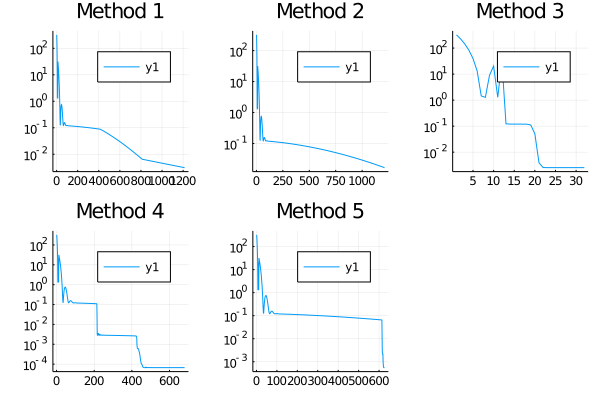

In [57]:
A=plot(losses_1a, title="Method 1",yaxis=:log)
B=plot(losses_2a, title="Method 2",yaxis=:log)
C=plot(losses_3a, title="Method 3",yaxis=:log)
D=plot(losses_4a, title="Method 4",yaxis=:log)
E=plot(losses_5a, title="Method 5",yaxis=:log)
plot(A,B,C,D,E,layout=5)

## Philipines

In [58]:
actual1= getCleandataFrame(country3)
para_1b,pred_value_1b,losses_1b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer1)
para_2b,pred_value_2b,losses_2b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer2)
para_3b,pred_value_3b,losses_3b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer3)
para_4b,pred_value_4b,losses_4b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer4)
para_5b,pred_value_5b,losses_5b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer5)

"Philippines"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:2
└ @ Core In[58]:2
loss: 19.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 5.95:  22%|██████████                               |  ETA: 0:01:20

5.95183765509028


loss: 5.1:  47%|████████████████████                     |  ETA: 0:00:54

5.100601861853032


loss: 4.17:  72%|██████████████████████████████           |  ETA: 0:00:29

4.165763544211679


loss: 3.26:  96%|████████████████████████████████████████ |  ETA: 0:00:04

3.2620287636542207


loss: 3.13: 100%|█████████████████████████████████████████| Time: 0:01:39
loss: 2.05:  21%|█████████                                |  ETA: 0:01:17

2.050384183710744


loss: 1.15:  46%|███████████████████                      |  ETA: 0:00:52

1.1518584936371563


loss: 0.6:  70%|█████████████████████████████            |  ETA: 0:00:28

0.5995083015863881


loss: 0.287:  95%|███████████████████████████████████████  |  ETA: 0:00:05

0.2868486226616532


loss: 0.245: 100%|█████████████████████████████████████████| Time: 0:01:30
loss: 0.212:  20%|████████                                 |  ETA: 0:01:10

0.21237818513587464


loss: 0.178:  44%|███████████████████                      |  ETA: 0:00:51

0.17775807784326028


loss: 0.148:  69%|█████████████████████████████            |  ETA: 0:00:29

0.14768825945573644


loss: 0.122:  94%|███████████████████████████████████████  |  ETA: 0:00:06

0.12184564852337293


loss: 0.116: 100%|█████████████████████████████████████████| Time: 0:01:32


"Philippines"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:3
└ @ Core In[58]:3
loss: 19.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 5.95:   7%|███                                      |  ETA: 0:04:42

5.95183765509028


loss: 5.1:  16%|███████                                  |  ETA: 0:04:24

5.100601861853032


loss: 4.17:  24%|██████████                               |  ETA: 0:03:50

4.165763544211679


loss: 3.26:  32%|██████████████                           |  ETA: 0:03:25

3.2620287636542207


loss: 2.45:  40%|█████████████████                        |  ETA: 0:02:58

2.4537390193189466


loss: 1.78:  48%|████████████████████                     |  ETA: 0:02:34

1.7752795075716958


loss: 1.24:  57%|████████████████████████                 |  ETA: 0:02:09

1.2368145011988327


loss: 0.83:  65%|███████████████████████████              |  ETA: 0:01:44

0.8301604697474624


loss: 0.537:  73%|███████████████████████████████          |  ETA: 0:01:18

0.5373816045586243


loss: 0.336:  82%|██████████████████████████████████       |  ETA: 0:00:53

0.3357605619953344


loss: 0.203:  90%|█████████████████████████████████████    |  ETA: 0:00:29

0.20326962819861108


loss: 0.12:  98%|█████████████████████████████████████████|  ETA: 0:00:06

0.11994957855655954


loss: 0.106: 100%|█████████████████████████████████████████| Time: 0:04:40


"Philippines"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:4
└ @ Core In[58]:4
loss: 19.4: 100%|█████████████████████████████████████████| Time: 0:00:02


"Philippines"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:5
└ @ Core In[58]:5
loss: 19.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 5.95:  44%|███████████████████                      |  ETA: 0:00:26

5.95183765509028


loss: 5.1:  94%|███████████████████████████████████████  |  ETA: 0:00:03

5.100601861853032


loss: 4.98: 100%|█████████████████████████████████████████| Time: 0:00:48
loss: 0.00118:  35%|███████████████                          |  ETA: 0:00:26

0.0011807058351476648


loss: 0.00116:  84%|███████████████████████████████████      |  ETA: 0:00:06

0.001156245211206784


loss: 0.00116: 100%|█████████████████████████████████████████| Time: 0:00:40
loss: 3.31e-05:   9%|████                                     |  ETA: 0:00:33

3.3070419784367816e-5


loss: 8.69e-06:  58%|████████████████████████                 |  ETA: 0:00:13

8.689003123008487e-6


loss: 8.69e-06: 100%|█████████████████████████████████████████| Time: 0:00:31


6.096407150395035e-6
"Philippines

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:6
└ @ Core In[58]:6
loss: 2.55e+04:  10%|█████                                    |  ETA: 0:00:02

"

loss: 19.4: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 5.95:  15%|██████                                   |  ETA: 0:01:58

5.95183765509028


loss: 5.1:  31%|█████████████                            |  ETA: 0:01:35

5.100601861853032


loss: 4.17:  48%|████████████████████                     |  ETA: 0:01:14

4.165763544211679


loss: 3.26:  64%|███████████████████████████              |  ETA: 0:00:50

3.2620287636542207


loss: 2.45:  81%|██████████████████████████████████       |  ETA: 0:00:28

2.4537390193189466


loss: 1.78:  97%|████████████████████████████████████████ |  ETA: 0:00:04

1.7752795075716958


loss: 1.67: 100%|█████████████████████████████████████████| Time: 0:02:25


(Float32[-0.48074386, -0.11979367, -0.45481244, -0.32488373, 0.114766635, -0.11277536, -0.0963226, -0.032934256, 0.11196223, -0.21347891  …  -0.2173139, -0.28462616, 0.053398367, 0.41406083, -0.40015757, 0.10315175, -0.3004471, 0.079773866, 0.47583404, 0.013388991], Float32[0.002211, -8.480361f-6, -0.00712391, -0.028094666, -0.01954796, 0.014127221, 0.027752532, 0.031572986, 0.033831216, 0.037733186  …  -0.044161804, -0.04654689, -0.045891397, -0.042029824, -0.034871534, -0.024017522, -0.008751557, 0.011924764, 0.038861122, 0.07285806], Any[25491.428483558575, 19459.206997234804, 14340.217640482797, 10031.812743375114, 6535.157403683877, 3856.7036919106727, 1940.282521695559, 727.8257033842134, 125.74626481848155, 19.404615453604453  …  0.008158446850287956, 0.002345582972193024, 0.0014589998679277601, 0.0013473800439276044, 0.0013465982095519225, 0.0013463209905617344, 0.0013460464154949159, 0.0013449390524881573, 0.001344906168368638, 0.001344906168368638])

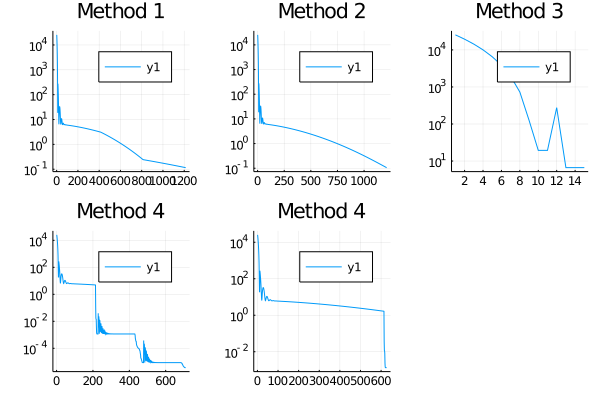

In [63]:
A=plot(losses_1b, title="Method 1",yaxis=:log)
B=plot(losses_2b, title="Method 2",yaxis=:log)
C=plot(losses_3b, title="Method 3",yaxis=:log)
D=plot(losses_4b, title="Method 4",yaxis=:log)
E=plot(losses_5b, title="Method 4",yaxis=:log)
plot(A,B,C,D,E,layout=5)

In [78]:
para,pred_value_mse, mses1,kdata=train_eqn1_addition_mse(country1,nnp,trainer4)
para,pred_value_abs, abs1,kdata=train_eqn1_addition_abs(country1,nnp,trainer4)

"Albania"

loss: 0.0454: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.000147:  42%|██████████████████                       |  ETA: 0:00:04

0.0001393591646248809

loss: 0.000136:  44%|███████████████████                      |  ETA: 0:00:04

loss: 3.36e-05:  93%|███████████████████████████████████████  |  ETA: 0:00:00

3.301317387298517e-5


loss: 2.62e-05: 100%|█████████████████████████████████████████| Time: 0:00:06
loss: 6.71e-07:  34%|██████████████                           |  ETA: 0:00:04

3.56019883393109e-7


loss: 3.17e-07:  84%|███████████████████████████████████      |  ETA: 0:00:01

3.221305965852959e-7

loss: 3.15e-07:  86%|████████████████████████████████████     |  ETA: 0:00:01

loss: 3.12e-07: 100%|█████████████████████████████████████████| Time: 0:00:05
loss: 3.22e-07:  30%|█████████████                            |  ETA: 0:00:03

3.2235710399117155e-7


loss: 3.16e-07:  77%|████████████████████████████████         |  ETA: 0:00:01

3.147010718223507e-7

loss: 3.09e-07:  80%|█████████████████████████████████        |  ETA: 0:00:01

loss: 3.15e-07: 100%|█████████████████████████████████████████| Time: 0:00:05


"Albania"

loss: 1.12: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.00527:  43%|██████████████████                       |  ETA: 0:00:05

0.0053723175022715635

loss: 0.00531:  45%|███████████████████                      |  ETA: 0:00:05

loss: 0.00402:  92%|██████████████████████████████████████   |  ETA: 0:00:01

0.004000541771527711

loss: 0.00398:  94%|███████████████████████████████████████  |  ETA: 0:00:00

loss: 0.00386: 100%|█████████████████████████████████████████| Time: 0:00:07
loss: 2.31e-05:  25%|███████████                              |  ETA: 0:00:06

5.122759783212025e-6

loss: 1.15e-05:  26%|███████████                              |  ETA: 0:00:06

loss: 4.36e-06:  74%|███████████████████████████████          |  ETA: 0:00:02

4.248608675458889e-6

loss: 4.24e-06:  76%|████████████████████████████████         |  ETA: 0:00:02

loss: 4.24e-06: 100%|█████████████████████████████████████████| Time: 0:00:06
loss: 4.31e-06:  20%|█████████                                |  ETA: 0:00:05

4.307874838544598e-6


loss: 4.3e-06:  70%|█████████████████████████████            |  ETA: 0:00:02

4.216376200140135e-6

loss: 4.28e-06:  71%|██████████████████████████████           |  ETA: 0:00:02

loss: 4.24e-06: 100%|█████████████████████████████████████████| Time: 0:00:06


4-element Array{Array{Any,1},1}:
 [-0.19281225f0, 0.13942808f0, -0.37756813f0, 0.4784352f0, 0.3635256f0, -0.27084616f0, 0.0072064274f0, -0.33477587f0, -0.15904486f0, -0.32892057f0  …  0.019724805f0, -0.11793018f0, 0.0124873975f0, -0.5044462f0, 0.19192557f0, -0.02036811f0, -0.21512805f0, -0.20450555f0, 0.42743534f0, 0.0144393705f0]
 [0.008234953f0, 0.00831049f0, 0.008468276f0, 0.009155292f0, 0.0092102345f0, 0.009064651f0, 0.009095944f0, 0.008949802f0, 0.008808522f0, 0.009037561f0  …  0.0088597145f0, 0.009108494f0, 0.009778727f0, 0.010643251f0, 0.011745035f0, 0.013245297f0, 0.015134539f0, 0.017329587f0, 0.01973467f0, 0.022286084f0]
 [35.19600350709695, 25.598363308971013, 17.533034429878857, 11.039917406608422, 6.120236824673307, 2.730458386467607, 0.7623077180320214, 0.028624985474468637, 0.26024603897980947, 1.1179950618706609  …  4.242266696139481e-6, 4.101343249325489e-6, 4.26411801787702e-6, 4.261785480930117e-6, 4.260223311801755e-6, 4.241359922588085e-6, 4.241221513404063e-6, 4.22

In [85]:
para,pred_value_mse2, mses2,kdata2=train_eqn1_addition_mse(country2,nnp,trainer4)
para,pred_value_abs2, abs_2,kdata2=train_eqn1_addition_abs(country2,nnp,trainer4)

"Australia

loss: 0.0301:  30%|█████████████                            |  ETA: 0:00:00

"

loss: 0.029: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.000179:  44%|██████████████████                       |  ETA: 0:00:04

0.00017087861844228562

loss: 0.000149:  46%|███████████████████                      |  ETA: 0:00:04

loss: 3.24e-05:  92%|██████████████████████████████████████   |  ETA: 0:00:01

3.224286497212299e-5

loss: 3.22e-05:  94%|███████████████████████████████████████  |  ETA: 0:00:00

loss: 3.18e-05: 100%|█████████████████████████████████████████| Time: 0:00:07
loss: 7.18e-06:  22%|██████████                               |  ETA: 0:00:05

6.4153243336609875e-6

loss: 6.49e-06:  24%|██████████                               |  ETA: 0:00:05

loss: 6.42e-06:  72%|██████████████████████████████           |  ETA: 0:00:02

6.46329515761168e-6

loss: 6.43e-06:  74%|███████████████████████████████          |  ETA: 0:00:02

loss: 6.28e-06: 100%|█████████████████████████████████████████| Time: 0:00:06
loss: 6.36e-06:  14%|██████                                   |  ETA: 0:00:06

6.291181882545744e-6

loss: 6.32e-06:  16%|███████                                  |  ETA: 0:00:06

loss: 6.33e-06:  64%|███████████████████████████              |  ETA: 0:00:02

6.325708700319458e-6


loss: 6.27e-06: 100%|█████████████████████████████████████████| Time: 0:00:06


"Australia"

loss: 0.781: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.00221:  43%|██████████████████                       |  ETA: 0:00:05

0.0020985769068969542


loss: 0.000799:  93%|███████████████████████████████████████  |  ETA: 0:00:01

0.0008040373789051575

loss: 0.000798:  94%|███████████████████████████████████████  |  ETA: 0:00:00

loss: 0.000786: 100%|█████████████████████████████████████████| Time: 0:00:08
loss: 0.000186:  33%|██████████████                           |  ETA: 0:00:05

0.00018874463057067483

loss: 0.00019:  34%|███████████████                          |  ETA: 0:00:05

loss: 0.000187:  84%|███████████████████████████████████      |  ETA: 0:00:01

0.0001865655176224394


loss: 0.000185: 100%|█████████████████████████████████████████| Time: 0:00:08
loss: 0.000186:  28%|████████████                             |  ETA: 0:00:05

0.00018589820993712445

loss: 0.000186:  30%|█████████████                            |  ETA: 0:00:05

loss: 0.000185:  78%|█████████████████████████████████        |  ETA: 0:00:02

0.00018493236967675536

loss: 0.000185:  80%|█████████████████████████████████        |  ETA: 0:00:02

loss: 0.000184: 100%|█████████████████████████████████████████| Time: 0:00:09


4-element Array{Array{Any,1},1}:
 [-0.46186158f0, 0.32589003f0, 0.04680675f0, -0.45192862f0, 0.14802253f0, 0.23669237f0, -0.16348347f0, 0.49934748f0, -0.1875269f0, -0.42771748f0  …  -0.45616013f0, -0.27784038f0, 0.47411245f0, -0.4296341f0, -0.5245251f0, -0.49673966f0, 0.26423404f0, -0.0020639303f0, 0.30228823f0, 0.012197154f0]
 [0.08835535f0, 0.091959156f0, 0.08832503f0, 0.09204133f0, 0.100104064f0, 0.10731321f0, 0.11157167f0, 0.11326516f0, 0.11411715f0, 0.11509674f0, 0.116458245f0, 0.11853103f0, 0.12133236f0, 0.12564477f0, 0.12949364f0, 0.13379192f0, 0.13923793f0, 0.14461076f0, 0.14961702f0, 0.15496942f0]
 [4.504925203710466, 2.9115202342537594, 1.695137739402011, 0.8522328221711435, 0.36035182366561447, 0.17358888928506486, 0.21811470808904732, 0.39742113709691906, 0.6112953270400153, 0.7808281344786994  …  0.00018443536492248624, 0.00018507655276681062, 0.0001859280530502357, 0.00018435375198721162, 0.00018436090845333407, 0.0001843789560419308, 0.00017432614206759685, 0.00018390754

In [86]:
para,pred_value_mse2, mses3,kdata2=train_eqn1_addition_mse(country3,nnp,trainer4)
para,pred_value_abs2, abs_3,kdata2=train_eqn1_addition_abs(country3,nnp,trainer4)

"Philippines"

loss: 0.132: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.000483:  43%|██████████████████                       |  ETA: 0:00:04

0.00044238349154490864


loss: 0.000155:  92%|██████████████████████████████████████   |  ETA: 0:00:01

0.00015249967605049646


loss: 0.000144: 100%|█████████████████████████████████████████| Time: 0:00:07
loss: 2.13e-05:  16%|███████                                  |  ETA: 0:00:06

1.9569483379358786e-5

loss: 3.67e-06:  18%|████████                                 |  ETA: 0:00:05

loss: 3.98e-07:  66%|████████████████████████████             |  ETA: 0:00:02

3.9836292627237276e-7


loss: 3.97e-07: 100%|█████████████████████████████████████████| Time: 0:00:07
loss: 2.63e-06:   2%|█                                        |  ETA: 0:00:07

2.6259188202879664e-6


loss: 2.35e-07:  51%|█████████████████████                    |  ETA: 0:00:03

2.352665687366733e-7


loss: 2.36e-07: 100%|█████████████████████████████████████████| Time: 0:00:05


2.3221824995776453e-7
"Philippines"

loss: 4.68: 100%|█████████████████████████████████████████| Time: 0:00:00
loss: 0.0141:  45%|███████████████████                      |  ETA: 0:00:04

0.01592711165494545


loss: 0.00146:  94%|███████████████████████████████████████  |  ETA: 0:00:00

0.0014624240478716768


loss: 0.00143: 100%|█████████████████████████████████████████| Time: 0:00:07
loss: 9.76e-05:  25%|███████████                              |  ETA: 0:00:05

3.342914726771363e-5

loss: 6.37e-05:  27%|████████████                             |  ETA: 0:00:05

loss: 2.1e-05:  76%|████████████████████████████████         |  ETA: 0:00:02

2.1033165003160566e-5


loss: 2.08e-05: 100%|█████████████████████████████████████████| Time: 0:00:06
loss: 2.1e-05:  24%|██████████                               |  ETA: 0:00:05

2.105183132157285e-5

loss: 2.14e-05:  26%|███████████                              |  ETA: 0:00:05

loss: 2.09e-05:  72%|██████████████████████████████           |  ETA: 0:00:02

2.0823851893675435e-5

loss: 2.09e-05:  74%|███████████████████████████████          |  ETA: 0:00:02

loss: 2.09e-05: 100%|█████████████████████████████████████████| Time: 0:00:06


4-element Array{Array{Any,1},1}:
 [-0.38491258f0, 0.27317226f0, 0.40553597f0, -0.47695613f0, -0.022135638f0, 0.13727432f0, 0.37256122f0, 0.18269882f0, 0.42927796f0, 0.09988107f0  …  0.5326948f0, -0.27079928f0, 0.43903613f0, 0.2298256f0, -0.38415802f0, 0.19457076f0, 0.048969146f0, -0.45736468f0, -0.39370412f0, -0.007873809f0]
 [0.0036125162f0, 0.003949528f0, 0.0036010584f0, 0.0046998975f0, 0.0053737313f0, 0.0052459263f0, 0.004871306f0, 0.0046501f0, 0.004646125f0, 0.0049426802f0  …  0.010061788f0, 0.010521145f0, 0.010942066f0, 0.011273507f0, 0.011532015f0, 0.011713257f0, 0.011836596f0, 0.011890532f0, 0.011853074f0, 0.011708065f0]
 [56.193379984288825, 38.80240290372007, 24.818253736600962, 14.206049056486826, 6.853974328968625, 2.515888470234008, 0.7798085034113886, 1.0578248236159784, 2.616391544746439, 4.68300656334105  …  2.1003200621588463e-5, 2.0851996851346763e-5, 2.089152082606565e-5, 2.0734522424490775e-5, 2.0804798590531573e-5, 2.0946448708301068e-5, 2.0626372405441295e-5, 2.076

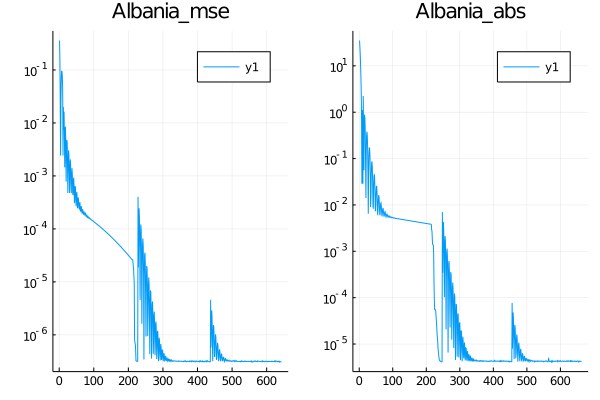

In [83]:
abl_mse=plot(mses1,title="Albania_mse",yaxis=:log)
abl_abs=plot(abs1,title="Albania_abs",yaxis=:log)
plot(abl_mse,abl_abs)
abs_mse= 